In [98]:
import sys
import getpass
import os
# import psutil
from os.path import join, dirname, getsize, exists
from glob import glob
import pickle
import numpy as np
import pandas as pd
import pingouin as pg
import scipy

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.stats.multitest
# from statsmodels.sandbox.stats.multicomp import multipletests

# import nilearn.masking
import nilearn
from nilearn import plotting as nplt
import nilearn.decoding

import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
# from sklearn.svm import LinearSVC

# import mydef as my Class correction for projects
import mydef

In [2]:
GA = mydef.GA()

OS : linux
Google Drive is detected!
Git directory is detected!


In [23]:
def load_tsmean_1D(fname):
    with open(join(fname),'rb') as fr:
        tsmean = np.genfromtxt(fr, delimiter='\n')

    return tsmean

In [7]:
dir_root = '/home/sungbeenpark/GA'

In [8]:
runs = ['r%02d'%(i+1) for i in range(6)]

# Load data

In [15]:
subj = '01'
stage = 'early'
stat = 'GLM.MO'

In [4]:
gg = 'GA' if visit=='early' else ('GB' if visit=='late' else None)

In [17]:
dir_tsmean = join(dir_root, stat, 'tsmean')

rois = np.load(join(dir_tsmean, 'rois.npy'))
rois

array(['Core_PCC_l', 'Core_PCC_r', 'Core_aMPFC_l', 'Core_aMPFC_r',
       'MTLsub_HF_l', 'MTLsub_HF_r', 'MTLsub_PHC_l', 'MTLsub_PHC_r',
       'MTLsub_Rsp_l', 'MTLsub_Rsp_r', 'MTLsub_pIPL_l', 'MTLsub_pIPL_r',
       'MTLsub_vMPFC', 'dMsub_LTC_l', 'dMsub_LTC_r', 'dMsub_TPJ_l',
       'dMsub_TPJ_r', 'dMsub_TempP_l_temp', 'dMsub_TempP_r_temp',
       'dMsub_dMPFC', 'fan105', 'fan106', 'fan189', 'fan190', 'fan193',
       'fan194', 'fan196', 'fan199', 'fan200', 'fan203', 'fan204',
       'fan205', 'fan206', 'fan209', 'n200_c1_L_Postcentral',
       'n200_c2_R_CerebellumIV-V', 'n200_c3_R_Postcentral',
       'n200_c4_L_Putamen', 'n200_c5_R_SMA', 'n200_c6_R_CerebellumVIIIb',
       'n200_c7_L_Thalamus'], dtype='<U30')

In [141]:
roia = np.random.choice(rois, replace=True)
roib = np.random.choice(rois, replace=True)

In [142]:
run = 'r01'

In [143]:
a = load_tsmean_1D(
    fname=join(dir_tsmean, roia, 'tsmean.bp_demean.errts.%s.%s.%s.%s.1D'%(stat[-2:],gg+subj,run,roia))
)
b = load_tsmean_1D(
    fname=join(dir_tsmean, roib, 'tsmean.bp_demean.errts.%s.%s.%s.%s.1D'%(stat[-2:],gg+subj,run,roib))
)
whole_brain = load_tsmean_1D(
    fname=join(dir_tsmean, 'full_mask', 'tsmean.bp_demean.errts.%s.%s.%s.full_mask.1D'%(stat[-2:],gg+subj,run))
)

In [144]:
# ap = load_tsmean_1D(
#     fname=join(
#         join(dir_root, 'GLM.RO', 'tsmean')
#         , roia, 'tsmean.bp_demean.errts.%s.%s.%s.%s.1D'%('RO',gg+subj,run,roia)
#     )
# )

Text(0.5, 1.0, 'r=0.1398 (p=3.374e-06)')

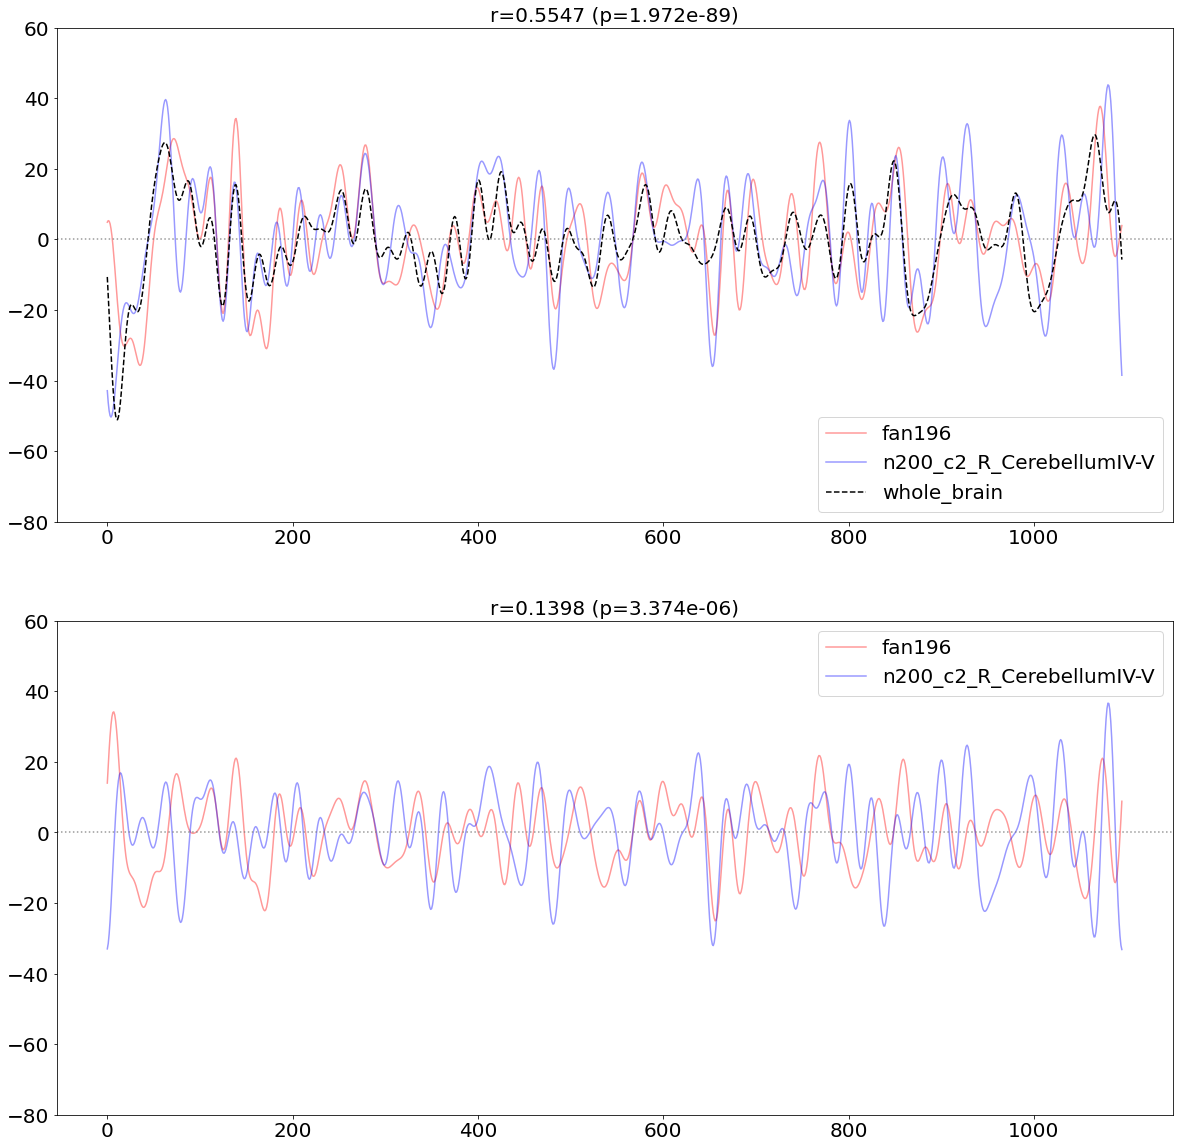

In [145]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20,20))

xrange = a.shape[0]

## raw plot
ax = axs[0]
ax.plot(np.arange(xrange), a, 'r-', label=roia, alpha=0.4)
# ax.plot(np.arange(xrange), ap, 'r--', label=roia, alpha=0.4)
ax.plot(np.arange(xrange), b, 'b-', label=roib, alpha=0.4)
ax.plot(np.arange(xrange), whole_brain, 'k--', label='whole_brain')
ax.set(xticks=range(0,xrange,200), yticks=range(-80,80,20))
ax.tick_params(axis="both", labelsize=20)
ax.legend(fontsize=20, loc='best')
ax.axhline(y=0, color='gray', linestyle=':', alpha=0.8)
ax.set_title('r=%.4f (p=%.3e)' % (*scipy.stats.pearsonr(x=a, y=b),), fontsize=20)

## preprocessed(partial correlation) plot
z = whole_brain / np.linalg.norm(whole_brain)
M = np.outer(z, z)
a_prep = a - np.matmul(M,a)
b_prep = b - np.matmul(M,b)

ax = axs[1]
ax.plot(np.arange(xrange), a_prep, 'r-', label=roia, alpha=0.4)
ax.plot(np.arange(xrange), b_prep, 'b-', label=roib, alpha=0.4)
ax.set(xticks=range(0,xrange,200), yticks=range(-80,80,20))
ax.tick_params(axis="both", labelsize=20)
ax.legend(fontsize=20, loc='best')
ax.axhline(y=0, color='gray', linestyle=':', alpha=0.8)
ax.set_title('r=%.4f (p=%.3e)' % (*scipy.stats.pearsonr(x=a_prep, y=b_prep),), fontsize=20)

In [146]:
print('%s\n%s\n%s'%(a,b,whole_brain))

[4.86506 5.31123 5.17536 ... 1.03033 2.5959  3.92195]
[-42.8659 -46.2454 -48.6069 ... -27.0505 -33.1856 -38.4899]
[-10.6422  -15.92    -21.3906  ...   2.477    -1.31694  -5.72624]


In [147]:
print('%s\n%s\n%s'%(a_prep,b_prep,z))

[13.9710476  18.9331618  23.47820512 ... -1.08911253  3.72273837
  8.82160143]
[-32.99635117 -31.48123307 -28.76931274 ... -29.34766341 -31.96427324
 -33.17939979]
[-0.02816107 -0.04212703 -0.05660317 ...  0.00655456 -0.00348485
 -0.01515261]


In [148]:
df = pd.DataFrame(columns=['a','b','z'])
df['a']=a
df['b']=b
df['z']=z
df

,a,b,z
0,4.865060,-42.8659,-0.028161
1,5.311230,-46.2454,-0.042127
2,5.175360,-48.6069,-0.056603
3,4.416190,-49.9572,-0.071094
4,3.020030,-50.3482,-0.085103
...,...,...,...
1091,-2.189910,-12.8843,0.021041
1092,-0.621376,-20.2286,0.014756
1093,1.030330,-27.0505,0.006555
1094,2.595900,-33.1856,-0.003485


In [149]:
pg.partial_corr(data=df, x='a', y='b', covar='z')

,n,r,CI95%,p-val
pearson,1096,0.139825,"[0.08, 0.2]",0.000003


In [150]:
scipy.stats.pearsonr(x=a_prep, y=b_prep)

(0.13982532397050534, 3.374442895343835e-06)

# Correlation Matrix

## Yera and Yunha's results

In [9]:
pkl_list = glob(join(GA.dir_root,"NAS05_data","network_analysis","*mat*"))
pkl_list

['/Users/clmn/Google Drive/내 드라이브/GA/NAS05_data/network_analysis/20200211_MOerrts_AM1_corrmat.mat',
 '/Users/clmn/Google Drive/내 드라이브/GA/NAS05_data/network_analysis/20200218_MOerrts_corrmat_byblock_extMotorAdded.pkl',
 '/Users/clmn/Google Drive/내 드라이브/GA/NAS05_data/network_analysis/corr_matrix_byblock',
 '/Users/clmn/Google Drive/내 드라이브/GA/NAS05_data/network_analysis/20200213_MOerrts_AM1_corrmat.pkl',
 '/Users/clmn/Google Drive/내 드라이브/GA/NAS05_data/network_analysis/20200213_MOerrts_AM1_connmat_early_prac.pkl',
 '/Users/clmn/Google Drive/내 드라이브/GA/NAS05_data/network_analysis/20200211_MOerrts_AM1_tsmean.mat',
 '/Users/clmn/Google Drive/내 드라이브/GA/NAS05_data/network_analysis/20200218_MOerrts_corrmat_extMotorAdded.pkl',
 '/Users/clmn/Google Drive/내 드라이브/GA/NAS05_data/network_analysis/20200211_multi_allegiance_avg_MOerrts_AM1_byblock.mat',
 '/Users/clmn/Google Drive/내 드라이브/GA/NAS05_data/network_analysis/20200211_MOerrts_AM1_corrmat_noblock.pkl',
 '/Users/clmn/Google Drive/내 드라이브/GA/NAS05_dat

In [11]:
temp = pkl_list[3]
with open(temp,"rb") as file:
    print(temp)
    corrmat = pickle.load(file)

/Users/clmn/Google Drive/내 드라이브/GA/NAS05_data/network_analysis/20200213_MOerrts_AM1_corrmat.pkl


In [12]:
subjs = []
runs = []
pairs = []
for subj, run, pair in list(corrmat.keys()):
    subjs.append(subj)
    runs.append(run)
    pairs.append(pair)
subjs = np.array(list(set(subjs))) ## 60 people
runs = np.array(list(set(runs)))   ## 6 runs
pairs = np.array(list(set(pairs)))   ## 52*52 pairs
rois = np.array(sorted(list(set(np.concatenate(pairs))))) ## 52 ROIs

In [13]:
rois

array(['Core_PCC_l', 'Core_PCC_r', 'Core_aMPFC_l', 'Core_aMPFC_r',
       'FuG_L_3_2', 'FuG_R_3_2', 'LOcC_L_2_1', 'LOcC_L_2_2', 'LOcC_L_4_1',
       'LOcC_L_4_3', 'LOcC_L_4_4', 'LOcC_R_2_1', 'LOcC_R_4_1',
       'LOcC_R_4_3', 'LOcC_R_4_4', 'MTLsub_HF_l', 'MTLsub_HF_r',
       'MTLsub_PHC_l', 'MTLsub_PHC_r', 'MTLsub_Rsp_l', 'MTLsub_Rsp_r',
       'MTLsub_pIPL_l', 'MTLsub_pIPL_r', 'MTLsub_vMPFC', 'MVOcC_L_5_1',
       'MVOcC_L_5_2', 'MVOcC_L_5_3', 'MVOcC_L_5_4', 'MVOcC_L_5_5',
       'MVOcC_R_5_1', 'MVOcC_R_5_2', 'MVOcC_R_5_3', 'MVOcC_R_5_4',
       'MVOcC_R_5_5', 'PCun_L_4_3', 'PCun_R_4_3', 'PhG_L_6_6',
       'PhG_R_6_6', 'dMsub_LTC_l', 'dMsub_LTC_r', 'dMsub_TPJ_l',
       'dMsub_TPJ_r', 'dMsub_TempP_l_temp', 'dMsub_TempP_r_temp',
       'dMsub_dMPFC', 'n200_c1_L_Postcentral', 'n200_c2_R_CerebellumIV-V',
       'n200_c3_R_Postcentral', 'n200_c4_L_Putamen', 'n200_c5_R_SMA',
       'n200_c6_R_CerebellumVIIIb', 'n200_c7_L_Thalamus'], dtype='<U25')

In [14]:
for roi in GA.roi_imgs.keys():
    print(roi in rois)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


# means of time series

## Comparing them

In [5]:
def read_tsmean_A(tsmean, subj, visit, run, ROI):
    ## Yera and Yunha's result
    tsmean_A = []
    for t in range(1096):
        tsmean_A.append(tsmean[gg+subj,run,t,ROI])
    tsmean_A = np.array(tsmean_A)
    return tsmean_A

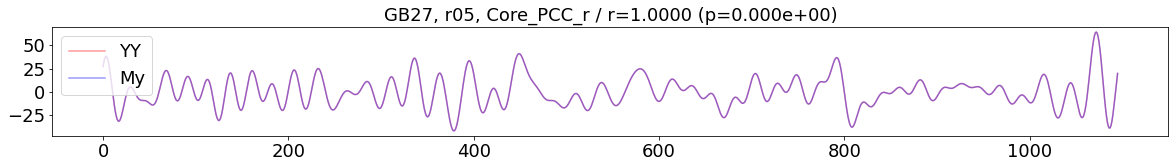

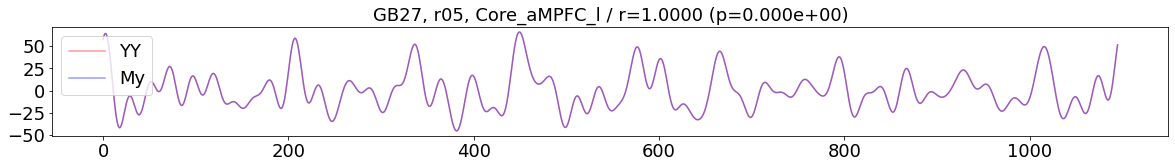

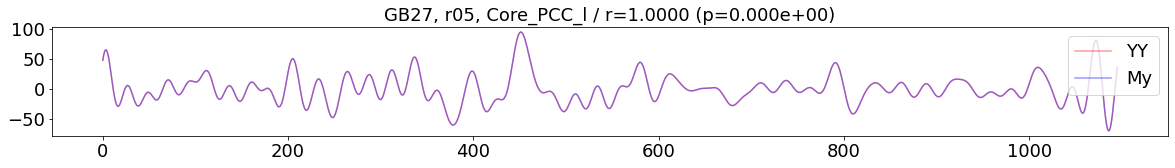

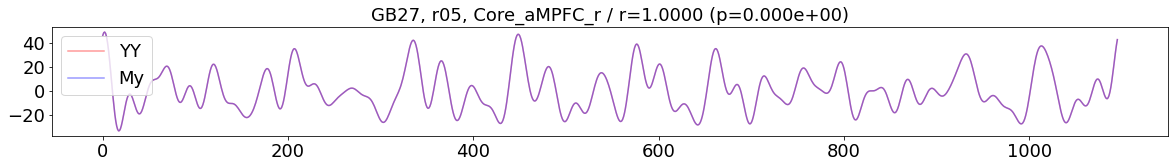

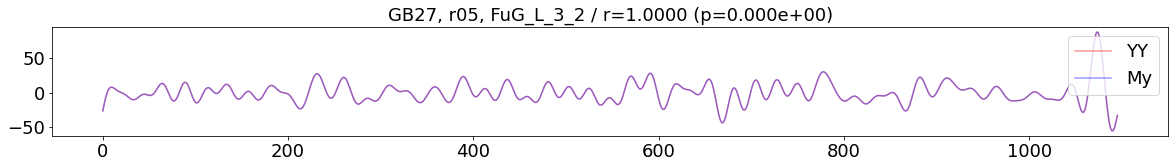

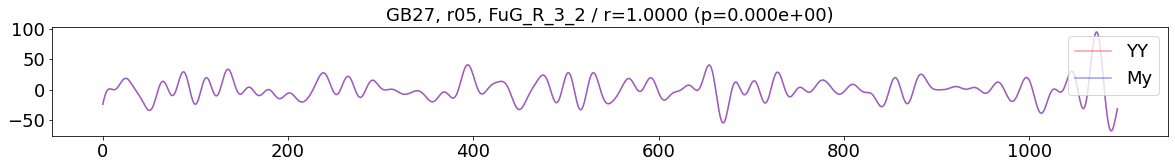

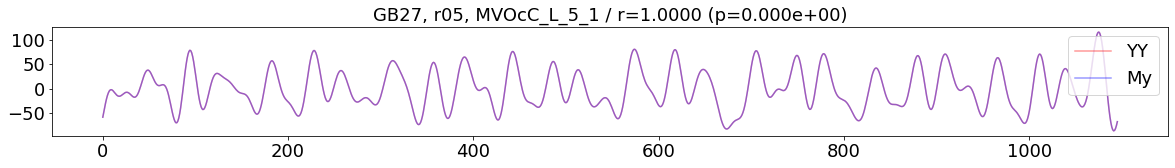

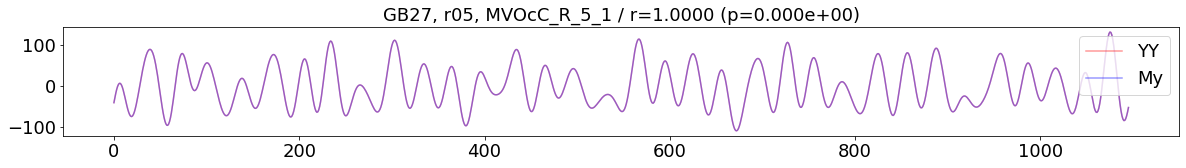

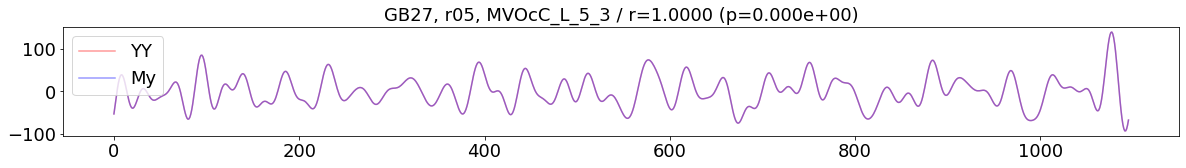

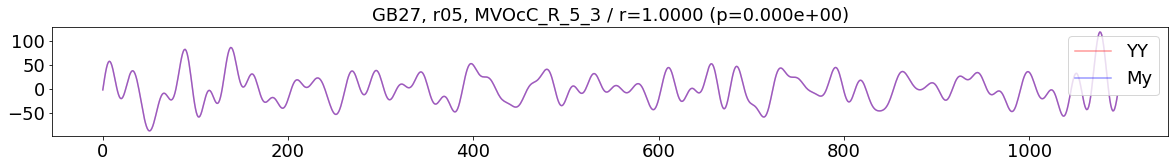

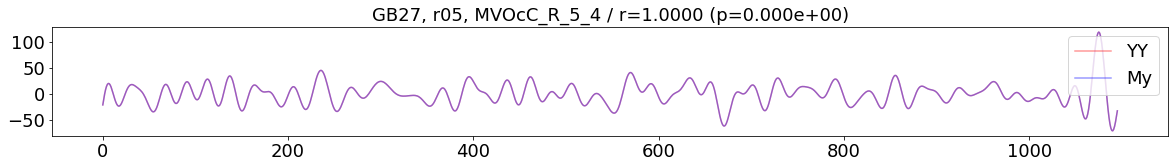

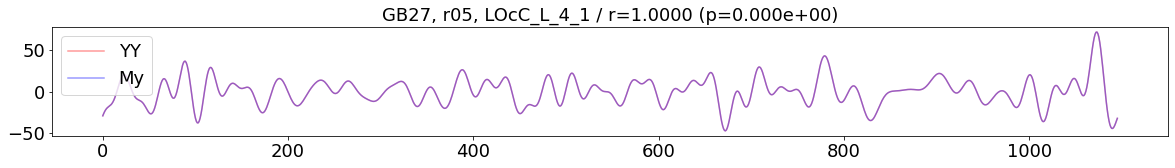

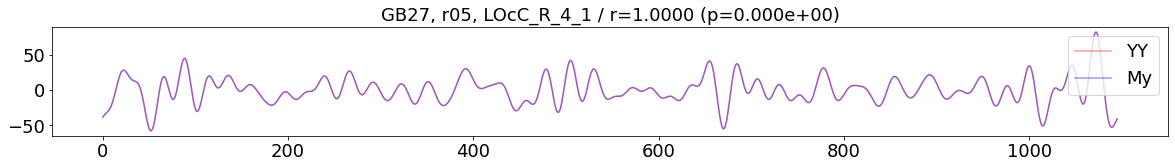

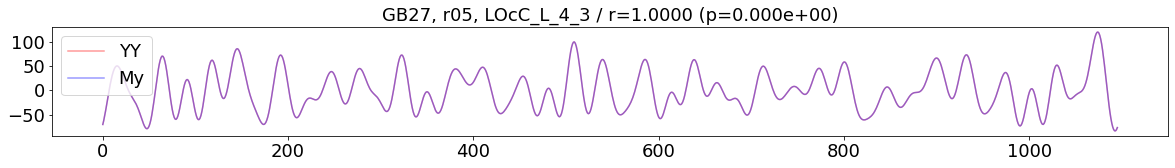

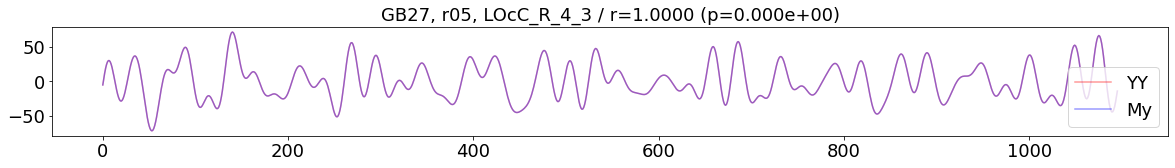

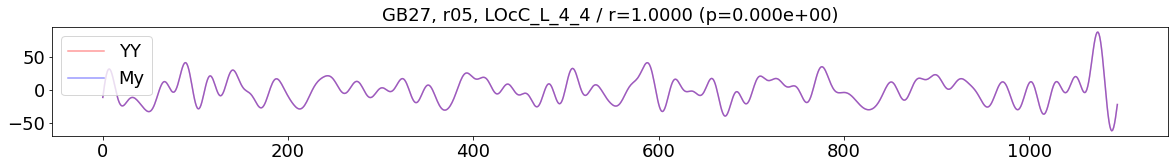

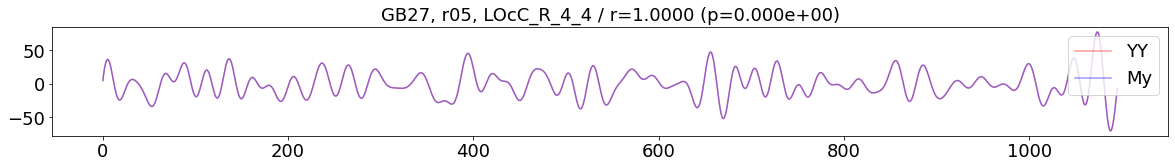

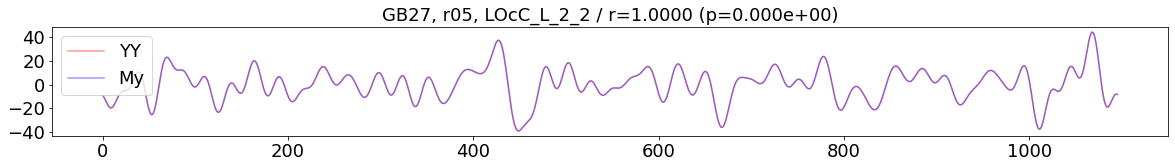

In [8]:
import random

subj = random.choice(GA.list_subj)
visit = random.choice(['early','late'])
run = random.choice([1,2,3,4,5,6])

gg = 'GA' if visit=='early' else ('GB' if visit=='late' else None)
tsmean = load_tsmean_from_YY(gg)

for roi in GA.roi_imgs.keys():
    if not 'Core' in roi:
        fan = list(GA.fan_info[GA.fan_info.region==roi].label)[0]
        mask = 'fan%s'%fan
    else:
        mask = roi
        
    X = read_tsmean_A(tsmean, subj, visit, run, roi)
    Y = read_tsmean_B(subj, visit, run, mask)

    plt.figure(figsize=(20,2))
    plt.plot(np.arange(1096), X, 'r-', label='YY', alpha=0.4)
    plt.plot(np.arange(1096), Y, 'b-', label='My', alpha=0.4)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend(fontsize=18)
    plt.title('%s, r%02d, %s / r=%.4f (p=%.3e)' % (gg+subj, run, roi, *scipy.stats.pearsonr(x=X, y=Y),), fontsize=18)